In [1]:
import numpy as np
from wbpj.utils import build_2d_rotation_matrix
from wbpj.weighted_backprojection import weighted_backprojection_1d
import matplotlib.pyplot as plt

In [33]:
num_angles = 128
image_resolution = 101


In [34]:
def _perform_single_projection(angle: float, ax: np.ndarray, centers: np.ndarray):
    R = build_2d_rotation_matrix(angle)

    rotated_centers = centers @ R
    proj_centers = (rotated_centers[:, 0]).reshape(-1, 1)

    dx = ax - proj_centers
    gaussians = np.exp(-(dx**2) / 0.1)
    return gaussians.sum(axis=0)


def _setup_images():
    centera = np.array([1.0, 0.0])
    centerb = np.array([0.0, 1.0])
    centerc = np.array([-1.0, -1.0])
    centers = np.vstack([centera, centerb, centerc]) / 2.0

#     angles = np.linspace(0, np.pi, num_angles, endpoint=False)
    angles = np.linspace(0, np.pi *.75 , num_angles, endpoint=False)
    ax = np.linspace(-4, 4, image_resolution)

    # Build the projection images
    imgs = []
    for angle in angles:
        imgs.append(_perform_single_projection(angle, ax, centers))

    XX, YY = np.meshgrid(ax, ax)

    dX = centers[:, 0].reshape(-1, 1, 1) - XX
    dY = centers[:, 1].reshape(-1, 1, 1) - YY

    sq_distance = dX**2 + dY**2
    gaussians = np.exp(-sq_distance / 0.1)
    volume = np.sum(gaussians, axis=0)
    volume /= np.sum(volume)

    return imgs, angles, volume

In [35]:
imgs, angles, vol = _setup_images()
reconstruction = weighted_backprojection_1d(imgs, angles)
reconstruction /= np.sum(reconstruction)

Text(0.5, 1.0, 'reconstructed')

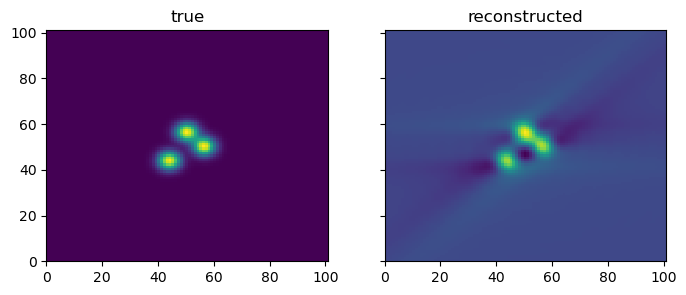

In [36]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 3))

axes[0].pcolor(vol)
axes[1].pcolor(reconstruction.real)
axes[0].set_title("true")
axes[1].set_title("reconstructed")